# Визуализация данных

**План:**

1. pandas - организация данных
2. Matplotlib
3. Seaborn
4. Wordcloud

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import re
import random
random.seed = 23  # фиксируем рандомизацию, чтобы работа воспроизводилась

### Данных

Данные - данные о [прокатных удостоверениях фильмов](https://opendata.mkrf.ru/opendata/7705851331-register_movies).

In [2]:
df = pd.read_csv("data-7-structure-4.csv.zip", parse_dates=[3, 4, 37, 44, 46, 47])

C:\Users\johola\AppData\Local\Temp\ipykernel_6800\4086642930.py:1: DtypeWarning: Columns (2,12,13,14,17,18,19,20,32,35,36,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data-7-structure-4.csv.zip", parse_dates=[3, 4, 37, 44, 46, 47])
C:\Users\johola\AppData\Local\Temp\ipykernel_6800\4086642930.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv("data-7-structure-4.csv.zip", parse_dates=[3, 4, 37, 44, 46, 47])


Посмотрим, насколько заполнены данные

In [3]:
# YOUR CODE HERE

In [4]:
df.head()

,Название фильма,Hаименование на иностранном языке,Номер удостоверения,Дата регистрации удостоверения,Дата начала показа фильма,Примечание,Идентификатор записи реестра,Аннотация,Вид Фильма,Категория,...,Код,Права проката переданы,Порядковый номер переоформления/продления,Должность подписанта,ФИО подписанта,Запись удалена,Дата удаления записи,Не показывать на сайте mkrf.ru,дата создания объекта,дата обновления объекта
0,Почти знаменит,Almost Famous,221006316,2016-02-09 12:00:00+00:00,2016-02-09 12:00:00+00:00,NaN,2157027,"В ролях: Фрэнсис МакДорманд, Кейт Хадсон. Исто...",Художественный,Видео,...,[],NaN,NaN,NaN,NaN,NaN,NaT,NaN,2017-07-05 14:10:11+03:00,2018-04-09 09:12:02+03:00
1,Открытое окно.,Open Window,221027814,2014-06-30 12:00:00+00:00,2014-06-30 12:00:00+00:00,NaN,2157028,"В главных ролях: Робин Тюннин, Джоэль Эдгертон...",Художественный,Видео,...,[],NaN,NaN,NaN,NaN,NaN,NaT,NaN,2017-07-05 14:10:11+03:00,2018-04-09 09:12:02+03:00
2,Открытый простор,Open Range,221048915,2015-11-27 12:00:00+00:00,2015-11-27 12:00:00+00:00,NaN,2157029,"Драма-вестерн. В ролях: Роберт Дюволл, Кевин К...",Художественный,Кино,...,[],NaN,NaN,NaN,NaN,NaN,NaT,NaN,2017-07-05 14:10:11+03:00,2018-04-09 09:12:02+03:00
3,Особо важное задание,NaN,111013716,2016-09-13 12:00:00+00:00,2016-09-13 12:00:00+00:00,Показ фильма в кинозале и прокат фильма на мат...,2157030,"В ролях - В.Заклунная, Н.Крючков, Е.Матвеев ...",Художественный,Кино,...,[],NaN,NaN,NaN,NaN,NaN,NaT,NaN,2017-07-05 14:10:11+03:00,2018-04-09 09:12:02+03:00
4,Особо опасен,Wanted,221038416,2016-10-10 12:00:00+00:00,2016-10-10 12:00:00+00:00,NaN,2157031,"В ролях: Джеймс МакЭвой, Анджелина Джоли. Тайн...",Художественный,Кино,...,[],NaN,NaN,NaN,NaN,NaN,NaT,NaN,2017-07-05 14:10:11+03:00,2021-04-06 12:16:16+03:00


## Графики


**Обычный график**

Точки по х и у соединены линиями. Нужен, если есть однозначное соответствие х и у и мы хотим показать как при изменении х меняется у. Например, по х может быть время, а по у - частотность слова (как на графиках в НКРЯ).

X: [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
Y: [8, 18, 41, 63, 81, 93, 85, 104, 125, 116]


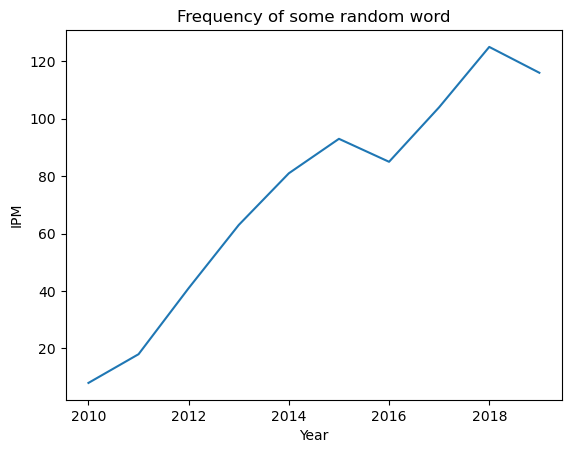

In [5]:
X = list(range(2010, 2020))
Y = [random.randint(i*10, (i+1)*20) for i in range(len(X))]

print('X:', X)
print('Y:', Y)

plt.plot(X, Y) # рисуем график - последовательно соединяем точки с координатами из X и Y
plt.title('Frequency of some random word') # заголовок
plt.ylabel('IPM') # подпись оси Х
plt.xlabel('Year') # подпись оси Y
plt.show()

Построим похожий график по кол-ву фильмов в каждый год.

Посмотрим, какие значения года. Там есть некачественно заполненные данные.

In [6]:
df["Год производства"].value_counts()

2006           4179
2005           3724
2009           3404
2004           3376
2003           3312
               ... 
1935-1937         1
1932-1937         1
1977 - 2007       1
1939, 2010        1
2018-2023         1
Name: Год производства, Length: 1250, dtype: int64

Напишем функцию, которая будет чистить значения и доставать первое значение из 4 цифр

In [7]:
def get_year(x):
    if type(x) == str:
        res = re.findall("[0-9]{4}", x)
        if res:
            return int(res[0])
    return None

In [8]:
df["Год производства"] = df["Год производства"].apply(get_year)

In [9]:
df["Год производства"].value_counts().sort_index()

1902.0       1
1908.0       3
1909.0      12
1910.0      11
1911.0      24
          ... 
2020.0    1828
2021.0    2102
2022.0    1934
2023.0     811
2099.0       1
Name: Год производства, Length: 118, dtype: int64

In [10]:
# YOUR CODE HERE

**Scatter plot**

Точки, как и раньше, задаются по х и у, но теперь не соединяются линиями. Такие гарфики используются для отображения наблюдений в эксперименте, когда есть два параметра, которые могут принимать различные значения и нужно показать, какие комюбинации есть и как они раположены.

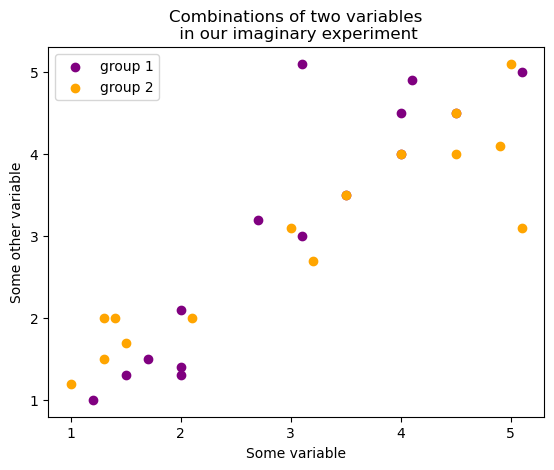

In [11]:
X = [1.2, 2, 3.1, 4, 5.1, 1.7, 1.5, 3.5, 4.5, 4, 2, 2, 2.7, 3.1, 4.1]
Y = [1, 1.4, 3, 4, 5, 1.5, 1.3, 3.5, 4.5, 4.5, 1.3, 2.1, 3.2, 5.1, 4.9]

plt.scatter(X, Y, color='purple', label='group 1') # меняем цвет, добавляем label
plt.scatter(Y, X, color='orange', label='group 2') # нарисуем еще какие-то значения на том же графике
plt.title('Combinations of two variables\n in our imaginary experiment') # перенос строки
plt.ylabel('Some other variable')
plt.xlabel('Some variable')
plt.legend(loc='best') # автоматический поиск места для легенды
plt.show()

Посмотрим на соотношение длины пленки и длины фильма (на примере первых фильмов в списке)

In [12]:
date_df = df[[
    "Метраж (для фильмов на кинопленке)", 
    "Продолжительность демонстрации, часы", 
    "Продолжительность демонстрации, минуты"
]].dropna().head(100)

date_df["length"] = date_df["Продолжительность демонстрации, часы"] * 60 + date_df["Продолжительность демонстрации, минуты"]
date_df["Метраж (для фильмов на кинопленке)"] = date_df["Метраж (для фильмов на кинопленке)"].astype(float)

In [13]:
# YOUR CODE HERE

Видно, что есть очевидная зависимость и можно посчитать, какая длина пленки соответствует минуте фильма

**Bar plot**

Столбчатая диграмма - для категориальных данных по х и чисел по у, например, если у нас есть дни недели и среднее количество ругательств, которое человек произносит в этот день.

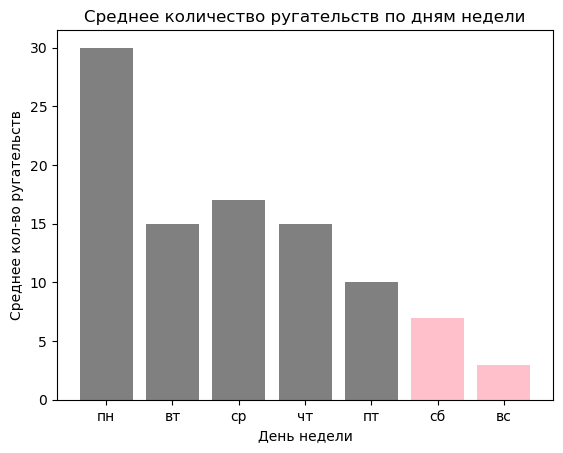

In [14]:
X = [1, 2, 3, 4, 5]
X2 = [6, 7] # сделаем выходные отдельно
Y = [30, 15, 17, 15, 10]
Y2 = [7, 3]
DAYS = ['пн', 'вт', 'ср', 'чт', 'пт', 'сб', 'вс']
plt.bar(X, Y, color='grey')
plt.bar(X2, Y2, color='pink')
plt.xticks(ticks=X+X2, labels=DAYS)
plt.title('Среднее количество ругательств по дням недели')
plt.ylabel('Среднее кол-во ругательств')
plt.xlabel('День недели')
plt.show()

Посмотрим на то, сколько фильмов разных типов. Опять же, нужно нормализовать данные, привести в нормальный вид.

In [15]:
df["Вид Фильма"].value_counts()

Художественный                    49469
Прочие                            13567
Анимационный                      11518
Документальный                    10117
 Художественный                    8958
Научно-популярный                  4462
Кинопериодика                       533
Прочее (Учебный, Спектакль, …)      308
Музыкально-развлекательный           24
научно-популярный                     4
Прочий                                3
 Анимационный                         3
документальный                        2
Документальный                        1
Name: Вид Фильма, dtype: int64

In [16]:
# YOUR CODE HERE

Посмотрим на то, в какие дни начинается показ фильмов. Кажется, что день премьеры - четверг. Но в данных это не так.

Применим функцию для извлечения номера дня недели из объекта типа дата.

In [17]:
df["Дата начала показа фильма"].apply(lambda x: x.weekday()).value_counts().sort_index()

0.0    20058
1.0    19932
2.0    18210
3.0    21130
4.0    16205
5.0     1696
6.0      892
Name: Дата начала показа фильма, dtype: int64

In [18]:
# YOUR CODE HERE

**Круговая диаграмма**

Этот тип графика показывает доли категорий объектов. Его нужно исопльзовать осторожно, так как если у нас мало данных, мы можем не получить адекватное представление об их распределении. Особенно, если мы сравниваем доли категори в 2 группах.

In [19]:
df['Страна производства'].value_counts().head(10)

Россия            36921
США               27775
СССР               7588
Великобритания     3501
Франция            2413
Индия              2208
Германия           1464
Италия             1191
Япония              764
Украина             705
Name: Страна производства, dtype: int64

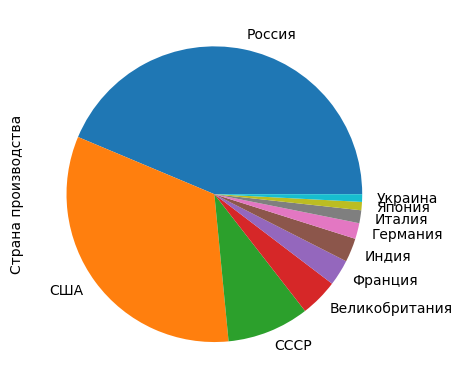

In [20]:
df['Страна производства'].value_counts().head(10).plot.pie();

**Heatmap**

Хитмэп нужен, когда у нас есть 3 переменные.

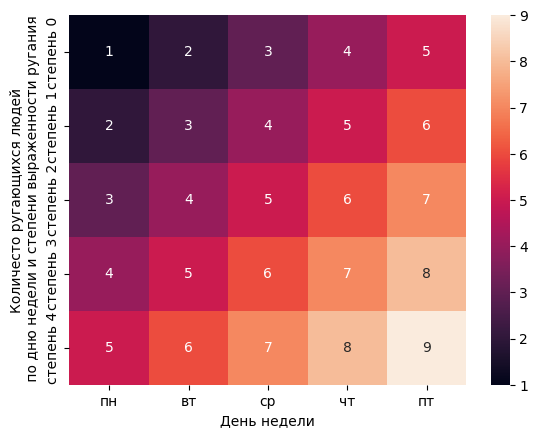

In [21]:
X = [
    [1, 2, 3, 4, 5],
    [2, 3, 4, 5, 6],
    [3, 4, 5, 6, 7],
    [4, 5, 6, 7, 8],
    [5, 6, 7, 8, 9],
]
sns.heatmap(
    X, # матрица значений
    annot=True, # значения из матрицы
    xticklabels=DAYS[:5],
    yticklabels=[f'степень {i}' for i in range(0, 5)]
)
plt.xlabel('День недели')
plt.ylabel('Степень выраженности ругания')
plt.ylabel('Количесто ругающихся людей\n по дню недели и степени выраженности ругания')
plt.show()

Для этого типа графика обычно приходится подготавливать данные.

Посмотрим, в какие дни недели стартуют фильмы разных видов:

1. Почистить текст, привести в удобную форму
2. Посчитать, сколько фильмов какого типа выходит по дням недели
3. Трансформировать данные в таблицу дни x виды
3. Отнормировать (превратить в показатели доли дня в общем числе фильмов категории)

In [22]:
df2 = df.dropna(subset=["Вид Фильма"])
df2.loc[:, "Вид Фильма"] = df2["Вид Фильма"].apply(lambda x: x.strip().lower().capitalize())
df2.loc[:, "Дата начала показа фильма"] = df2["Дата начала показа фильма"].apply(lambda x: x.weekday())

C:\Users\johola\AppData\Local\Temp\ipykernel_6800\3460169810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, "Вид Фильма"] = df2["Вид Фильма"].apply(lambda x: x.strip().lower().capitalize())
C:\Users\johola\AppData\Local\Temp\ipykernel_6800\3460169810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, "Дата начала показа фильма"] = df2["Дата начала показа фильма"].apply(lambda x: x.weekday())


In [23]:
df2 = df2.groupby(["Вид Фильма", "Дата начала показа фильма"], as_index=False).agg({"Название фильма": "count"})
df2.head()

,Вид Фильма,Дата начала показа фильма,Название фильма
0,Анимационный,0.0,2270
1,Анимационный,1.0,2317
2,Анимационный,2.0,2227
3,Анимационный,3.0,2330
4,Анимационный,4.0,1889


Превращаем в таблицу нужного вида

In [24]:
df2 = df2.pivot_table(index="Вид Фильма", columns="Дата начала показа фильма", values="Название фильма")
df2

Дата начала показа фильма,0.0,1.0,2.0,3.0,4.0,5.0,6.0
Вид Фильма,,,,,,,
Анимационный,2270.0,2317.0,2227.0,2330.0,1889.0,317.0,89.0
Документальный,1775.0,1839.0,2040.0,2097.0,1688.0,351.0,205.0
Кинопериодика,106.0,131.0,91.0,101.0,97.0,3.0,4.0
Музыкально-развлекательный,2.0,4.0,4.0,9.0,2.0,2.0,NaN
Научно-популярный,927.0,824.0,884.0,882.0,781.0,92.0,48.0
"Прочее (учебный, спектакль, …)",59.0,31.0,42.0,99.0,36.0,21.0,17.0
Прочие,2791.0,2808.0,2764.0,3057.0,2071.0,45.0,31.0
Прочий,NaN,NaN,NaN,1.0,1.0,1.0,NaN
Художественный,12125.0,11978.0,10158.0,12553.0,9639.0,864.0,498.0


Превращаем в доли: делим на сумму в строке.

In [25]:
df3 = df2.div(df2.sum(axis=1), axis=0)
df3

Дата начала показа фильма,0.0,1.0,2.0,3.0,4.0,5.0,6.0
Вид Фильма,,,,,,,
Анимационный,0.198444,0.202553,0.194685,0.203689,0.165137,0.027712,0.007780
Документальный,0.177589,0.183992,0.204102,0.209805,0.168884,0.035118,0.020510
Кинопериодика,0.198874,0.245779,0.170732,0.189493,0.181989,0.005629,0.007505
Музыкально-развлекательный,0.086957,0.173913,0.173913,0.391304,0.086957,0.086957,NaN
Научно-популярный,0.208878,0.185669,0.199189,0.198738,0.175980,0.020730,0.010816
"Прочее (учебный, спектакль, …)",0.193443,0.101639,0.137705,0.324590,0.118033,0.068852,0.055738
Прочие,0.205720,0.206973,0.203730,0.225326,0.152650,0.003317,0.002285
Прочий,NaN,NaN,NaN,0.333333,0.333333,0.333333,NaN
Художественный,0.209721,0.207178,0.175698,0.217124,0.166721,0.014944,0.008614


Убираем те, где мало данных

In [26]:
df3 = df3.drop(["Музыкально-развлекательный", "Прочее (учебный, спектакль, …)", "Прочий"])
df3

Дата начала показа фильма,0.0,1.0,2.0,3.0,4.0,5.0,6.0
Вид Фильма,,,,,,,
Анимационный,0.198444,0.202553,0.194685,0.203689,0.165137,0.027712,0.007780
Документальный,0.177589,0.183992,0.204102,0.209805,0.168884,0.035118,0.020510
Кинопериодика,0.198874,0.245779,0.170732,0.189493,0.181989,0.005629,0.007505
Научно-популярный,0.208878,0.185669,0.199189,0.198738,0.175980,0.020730,0.010816
Прочие,0.205720,0.206973,0.203730,0.225326,0.152650,0.003317,0.002285
Художественный,0.209721,0.207178,0.175698,0.217124,0.166721,0.014944,0.008614


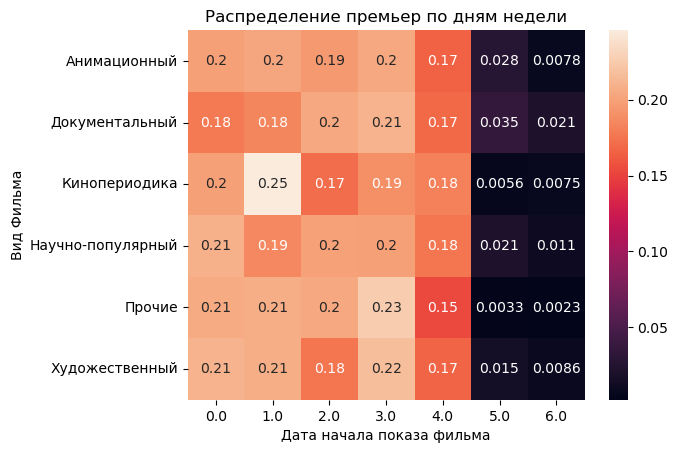

In [27]:
sns.heatmap(df3, annot=True)
plt.title("Распределение премьер по дням недели");

Особенной разницы нет

**Гистограмма**

Главное отличие гистограммы от барплота - на гистограмме у нас одна переменная и мы хотим изучить только ее: сколько объектов с тем или иным значением (в промежуке значений), а барплот - это значения по категориям.

Посмотрим на распределение длин фильмов

In [35]:
df

,Название фильма,Hаименование на иностранном языке,Номер удостоверения,Дата регистрации удостоверения,Дата начала показа фильма,Примечание,Идентификатор записи реестра,Аннотация,Вид Фильма,Категория,...,Код,Права проката переданы,Порядковый номер переоформления/продления,Должность подписанта,ФИО подписанта,Запись удалена,Дата удаления записи,Не показывать на сайте mkrf.ru,дата создания объекта,дата обновления объекта
0,Почти знаменит,Almost Famous,221006316,2016-02-09 12:00:00+00:00,2016-02-09 12:00:00+00:00,NaN,2157027,"В ролях: Фрэнсис МакДорманд, Кейт Хадсон. Исто...",Художественный,Видео,...,[],NaN,NaN,NaN,NaN,NaN,NaT,NaN,2017-07-05 14:10:11+03:00,2018-04-09 09:12:02+03:00
1,Открытое окно.,Open Window,221027814,2014-06-30 12:00:00+00:00,2014-06-30 12:00:00+00:00,NaN,2157028,"В главных ролях: Робин Тюннин, Джоэль Эдгертон...",Художественный,Видео,...,[],NaN,NaN,NaN,NaN,NaN,NaT,NaN,2017-07-05 14:10:11+03:00,2018-04-09 09:12:02+03:00
2,Открытый простор,Open Range,221048915,2015-11-27 12:00:00+00:00,2015-11-27 12:00:00+00:00,NaN,2157029,"Драма-вестерн. В ролях: Роберт Дюволл, Кевин К...",Художественный,Кино,...,[],NaN,NaN,NaN,NaN,NaN,NaT,NaN,2017-07-05 14:10:11+03:00,2018-04-09 09:12:02+03:00
3,Особо важное задание,NaN,111013716,2016-09-13 12:00:00+00:00,2016-09-13 12:00:00+00:00,Показ фильма в кинозале и прокат фильма на мат...,2157030,"В ролях - В.Заклунная, Н.Крючков, Е.Матвеев ...",Художественный,Кино,...,[],NaN,NaN,NaN,NaN,NaN,NaT,NaN,2017-07-05 14:10:11+03:00,2018-04-09 09:12:02+03:00
4,Особо опасен,Wanted,221038416,2016-10-10 12:00:00+00:00,2016-10-10 12:00:00+00:00,NaN,2157031,"В ролях: Джеймс МакЭвой, Анджелина Джоли. Тайн...",Художественный,Кино,...,[],NaN,NaN,NaN,NaN,NaN,NaT,NaN,2017-07-05 14:10:11+03:00,2021-04-06 12:16:16+03:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98969,Проклятое наследие,Perpetrator,121033723,2023-09-12 12:00:00+00:00,2023-09-14 12:00:00+00:00,NaN,9577222,NaN,Художественный,Кино,...,[],NaN,NaN,Первый заместитель Министра,С.Г. Обрывалин,NaN,NaT,NaN,2023-09-12 10:16:29+03:00,2023-09-12 12:12:35+03:00
98970,Селигерье,NaN,113005523,2023-09-13 12:00:00+00:00,2023-09-16 12:00:00+00:00,NaN,9578295,Научно-популярный фильм об озере Селигер,Научно-популярный,Кино,...,[],NaN,NaN,Первый заместитель Министра,С.Г. Обрывалин,NaN,NaT,NaN,2023-09-12 12:50:21+03:00,2023-09-12 12:50:21+03:00
98971,Край света,NaN,212019323,2023-09-13 12:00:00+00:00,NaT,NaN,9578352,"Фильм о гиде на костылях, живущем в Приморье",Документальный,Видео,...,[],NaN,NaN,Первый заместитель Министра,С.Г. Обрывалин,NaN,NaT,NaN,2023-09-12 13:10:02+03:00,2023-09-12 13:10:02+03:00
98972,"""Фиксики. Дай пять!"", серии ""Скелет"", ""Вакуум""...",NaN,214015023,2023-09-13 12:00:00+00:00,2023-09-25 12:00:00+00:00,NaN,9578527,Детский мультсериал,Анимационный,Видео,...,[],NaN,NaN,Первый заместитель Министра,С.Г. Обрывалин,NaN,NaT,NaN,2023-09-12 13:47:34+03:00,2023-09-12 13:47:34+03:00


In [49]:
df["Продолжительность демонстрации, минуты"] = df["Продолжительность демонстрации, минуты"].apply(lambda x: x.split("/")[0] if "/" in str(x) else x)
times = (df["Продолжительность демонстрации, часы"] * 60 + df["Продолжительность демонстрации, минуты"].astype(float)).sort_values()

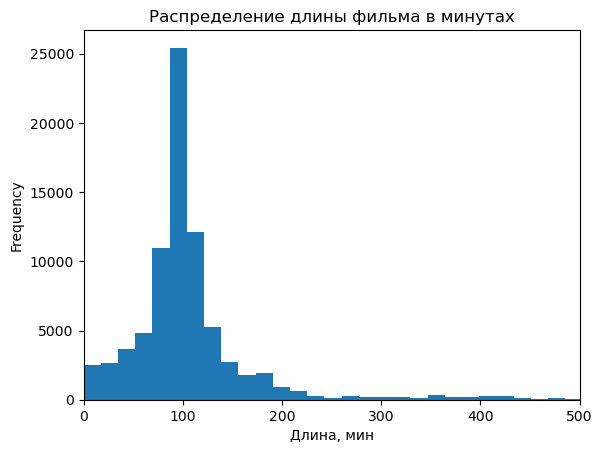

In [50]:
times.plot.hist(bins=1000, xlim=(0, 500), title="Распределение длины фильма в минутах")
plt.xlabel("Длина, мин");

<Figure size 1000x600 with 0 Axes>

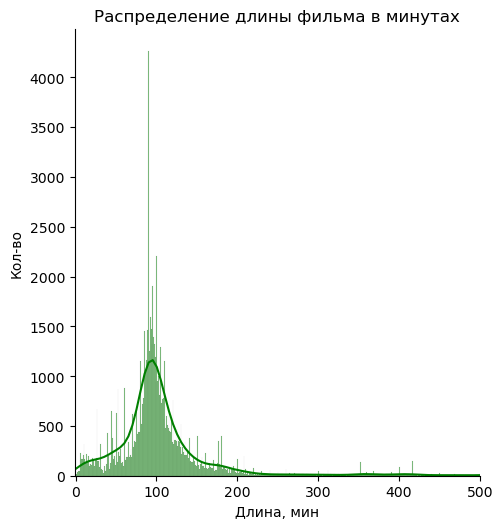

In [51]:
plt.figure(figsize=(10, 6))
sns.displot(times[times < 1000].dropna(), bins=1000, color='green', kde=True);
plt.xlim((-1, 500))
plt.title('Распределение длины фильма в минутах')
plt.ylabel('Кол-во')
plt.xlabel('Длина, мин');

## Seaborn

Посмотрим, как те же самые графики можно построить c помощью библиотеки seaborn.

### Plot

In [ ]:
sns.set_style("darkgrid")
sns.lineplot(data=df["Год производства"].value_counts())
plt.title("Количество фильмов по году производству")
plt.xlabel("Год производства")
plt.ylabel("Количество фильмов")
plt.show()

### Scatter plot

In [ ]:
sns.scatterplot(data=date_df, x="Метраж (для фильмов на кинопленке)", y="length", alpha=0.5)
plt.title("Связь длины пленки и продолжительности фильма")
plt.xlabel("Метраж (для фильмов на кинопленке)")
plt.ylabel("Продолжительность фильма")
plt.show()

### Bar plot

In [ ]:
sns.barplot(x=film_type.index, y=film_type.values)
plt.title("Количество фильмов разного вида")
plt.xlabel("Вид фильма")
plt.ylabel("Количество фильмов")
plt.xticks(rotation=45)
plt.show()

In [ ]:
sns.barplot(y=film_type.index, x=film_type.values)
plt.title("Количество фильмов разного вида")
plt.xlabel("Вид фильма")
plt.ylabel("Количество фильмов")
plt.xticks(rotation=45)
plt.show()

### Wordcloud

Один из видов визуализации текста - это облако слов. В зависимости от частотности слова меняется его размер на картинке

In [ ]:
from pymorphy2 import MorphAnalyzer
from nltk.tokenize import wordpunct_tokenize

morph = MorphAnalyzer()

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

stops = set(stopwords.words('russian') + ['это', 'весь', 'который', 'мочь', 'свой'])

In [ ]:
def lemmatize(x):
    if type(x) != str:
        return ""
    text = wordpunct_tokenize(x)
    result = []
    for word in text:
        if word.isalpha():
            nf = morph.parse(word)[0].normal_form
            if nf not in stops:
                result.append(nf)
    return " ".join(result)

In [ ]:
text = ' '.join(df["Аннотация"].head(2000).apply(lemmatize).values)

In [ ]:
wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако слов (включая стоп-слова)')
plt.show()